## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [14]:
import numpy as np

import torch
from torch import nn
import torch.optim as optim
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9.91M/9.91M [00:08<00:00, 1.24MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 185kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 903kB/s]


Text(0.5, 1.0, 'Image label: 1')

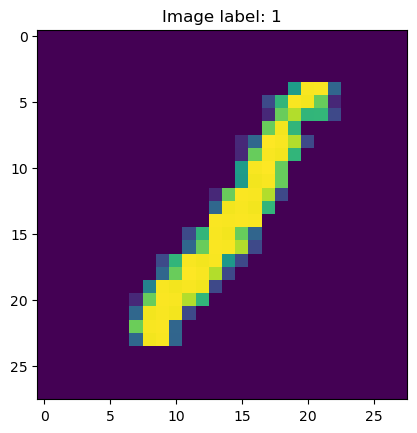

In [3]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_mnist_data = MNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [12]:
# Creating model instance
class SympleModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        l1 = nn.Linear(input_size, hidden_size)
        a1 = nn.ReLU()
        l2 = nn.Linear(hidden_size,hidden_size)
        a2 = nn.ReLU()
        l3 = nn.Linear(hidden_size,num_classes)
        
        l = [l1,a1,l2,a2,l3]
        self.module_list = nn.ModuleList(l)
        
    def forward(self, x):
        for layer in self.module_list:
            x = layer(x)
        return x
        
# Параметры
input_size = 784  # пример для изображений 28x28
hidden_size = 16  # размер скрытого слоя
num_classes = 10   # количество классов для классификации

model = SympleModel(input_size, hidden_size, num_classes)


Локальные тесты для проверки вашей модели доступны ниже:

In [13]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, "Please, use `model` variable to store your model"

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [17]:
# your code here
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 10
for epoch in range(num_epochs):
    for batch_X, batch_y in train_data_loader:
        batch_X = batch_X.reshape(-1, 784)
        
        # Прямой проход
        pred = model(batch_X)
        loss = loss_fn(pred, batch_y)

        # Backward pass и оптимизация
        optimizer.zero_grad()  # Обнуление градиентов
        loss.backward()  # Вычисление градиентов
        optimizer.step()  # Обновление весов

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.4172
Epoch [2/10], Loss: 0.1983
Epoch [3/10], Loss: 0.2867
Epoch [4/10], Loss: 0.2001
Epoch [5/10], Loss: 0.1195
Epoch [6/10], Loss: 0.0951
Epoch [7/10], Loss: 0.6912
Epoch [8/10], Loss: 0.3190
Epoch [9/10], Loss: 0.0868
Epoch [10/10], Loss: 0.0144


Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [18]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [19]:
print(f"Neural network accuracy on train set: {train_acc:3.5}")

Neural network accuracy on train set: 0.9433


In [20]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [21]:
print(f"Neural network accuracy on test set: {test_acc:3.5}")

Neural network accuracy on test set: 0.9374


Проверка, что необходимые пороги пройдены:

In [22]:
assert test_acc >= 0.92, "Test accuracy is below 0.92 threshold"
assert (
    train_acc >= 0.91
), "Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow"

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки.

In [24]:
# do not change the code in the block below
# __________start of block__________
import os
import json

assert os.path.exists(
    "hw07_data_dict.npy"
), "Please, download `hw07_data_dict.npy` and place it in the working directory"


def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels_np = torch.cat(predicted_labels).numpy()
    predicted_labels_str = ",".join([str(x) for x in list(predicted_labels)])
    return predicted_labels_np, predicted_labels_str


loaded_data_dict = np.load("hw07_data_dict.npy", allow_pickle=True)

train_labels_np, train_labels_str = get_predictions(
    model, torch.FloatTensor(loaded_data_dict.item()["train"])
)
test_labels_np, test_labels_str = get_predictions(
    model, torch.FloatTensor(loaded_data_dict.item()["test"])
)

submission_dict_str = {
    "train": train_labels_str,
    "test": test_labels_str,
}

submission_dict_np = {
    "train": train_labels_np,
    "test": test_labels_np,
}

np.save("submission_dict_hw07.npy", submission_dict_np, allow_pickle=True)
with open("submission_dict_hw07.json", "w") as iofile:
    json.dump(submission_dict_str, iofile)
print("File saved to `submission_dict_hw07.json` and `submission_dict_hw07.npy`")
# __________end of block__________

File saved to `submission_dict_hw07.json` and `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!